# Neuralworks

## Data Scientist Challenge - LATAM Airlines

### Rodrigo González Kusnir

In [18]:
#Importamos librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

#Ajustamos algunos parámetros de sns generales 
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [4]:
#Carga y lectura del dataset

df = pd.read_csv("dataset_SCL.csv", sep=",", error_bad_lines=False, index_col=False, dtype='unicode')
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
#Información de las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  object
 11  MES        68206 non-null  object
 12  AÑO        68206 non-null  object
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: object(18)
memory usage: 9.4+ MB


In [21]:
#Cheuqeamos valores NA

df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [7]:
#Quitamos los NA

df = df.dropna() 

#### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [8]:
#Total Vuelos

n_vuelos = str(len(df))
n_vuelos 

'68205'

In [9]:
#Descripción del dataset

df.describe(datetime_is_numeric=True, include='all')

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205
unique,53252,584,1,64,30,62774,861,1,63,32,31,12,2,7,2,23,1,62
top,2017-07-28 13:30:00,174,SCEL,SCFA,LAN,2017-05-19 07:01:00,174,SCEL,SCFA,LAN,20,12,2017,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,6,686,68205,5787,37611,5,649,68205,5786,20988,2290,6356,68203,10292,36966,40892,68205,6335


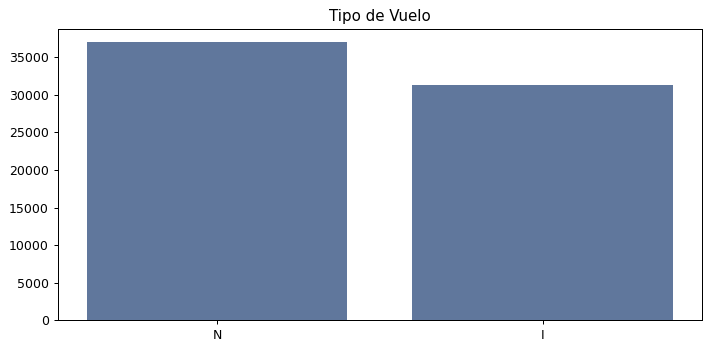

In [106]:
#Gráfica por tipo de Vuelo

plt.figure(figsize=(8,4), dpi=90)
plt.bar(df['TIPOVUELO'].value_counts().reset_index()["index"], df['TIPOVUELO'].value_counts().reset_index()["TIPOVUELO"])
plt.title("Tipo de Vuelo")
plt.tight_layout()
plt.show()


In [17]:
#Valores que toma la variable SIGLADES o Ciudad de Destino

print(df['SIGLADES'].unique())

['Miami' 'Dallas' 'Buenos Aires' 'Toronto' 'Paris' 'Ciudad de Mexico'
 'Bogota' 'Roma' 'Londres' 'Ciudad de Panama' 'Atlanta' 'Sao Paulo'
 'Rio de Janeiro' 'Florianapolis' 'Madrid' 'Lima' 'Sydney' 'Houston'
 'Asuncion' 'Cataratas Iguacu' 'Puerto Montt' 'Punta Arenas'
 'Puerto Natales' 'Balmaceda' 'Temuco' 'Valdivia' 'Concepcion' 'La Serena'
 'Copiapo' 'Calama' 'Antofagasta' 'Iquique' 'Arica' 'Mendoza' 'Cordoba'
 'Montevideo' 'Castro (Chiloe)' 'Osorno' 'Orlando' 'Nueva York'
 'Guayaquil' 'Cancun' 'Punta Cana' 'Los Angeles' 'Auckland N.Z.'
 'Isla de Pascua' 'La Paz' 'Santa Cruz' 'Curitiba, Bra.' 'Quito'
 'Bariloche' 'Rosario' 'Washington' 'Tucuman' 'Melbourne' 'San Juan, Arg.'
 'Neuquen' 'Pisco, Peru' 'Ushuia' 'Puerto Stanley' 'Punta del Este'
 'Cochabamba']


<AxesSubplot:title={'center':'Ciudad de Destino'}>

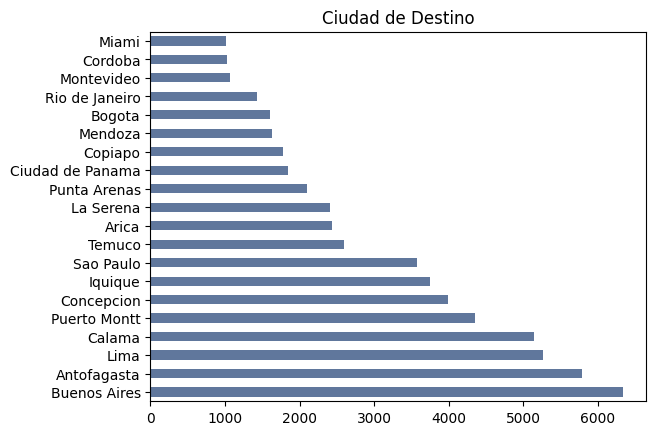

In [49]:
#Gráfica por nombre ciudad de destino para las 20 ciudades con mayor cantidad de vuelos

plot_sdes = df['SIGLADES'].value_counts()[:20].plot(kind='barh', title='Ciudad de Destino')
plot_sdes

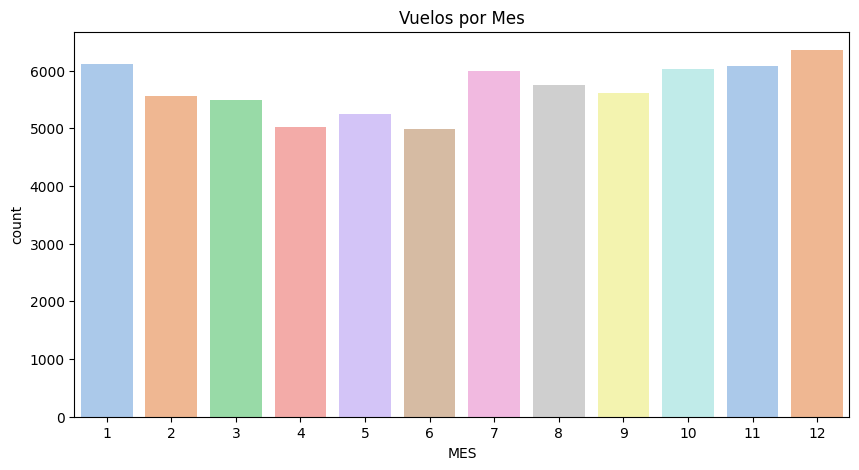

In [148]:
#Gráfica de Vuelos por Mes
#OBS: Dado que la data comprende casi toda la data de 2017 (-2 obs que no), utilizamos la variable mes para identificar como distribuyen

plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df['MES'], palette="pastel")
plt.title("Vuelos por Mes")
plt.xticks(rotation=0)
plt.show()


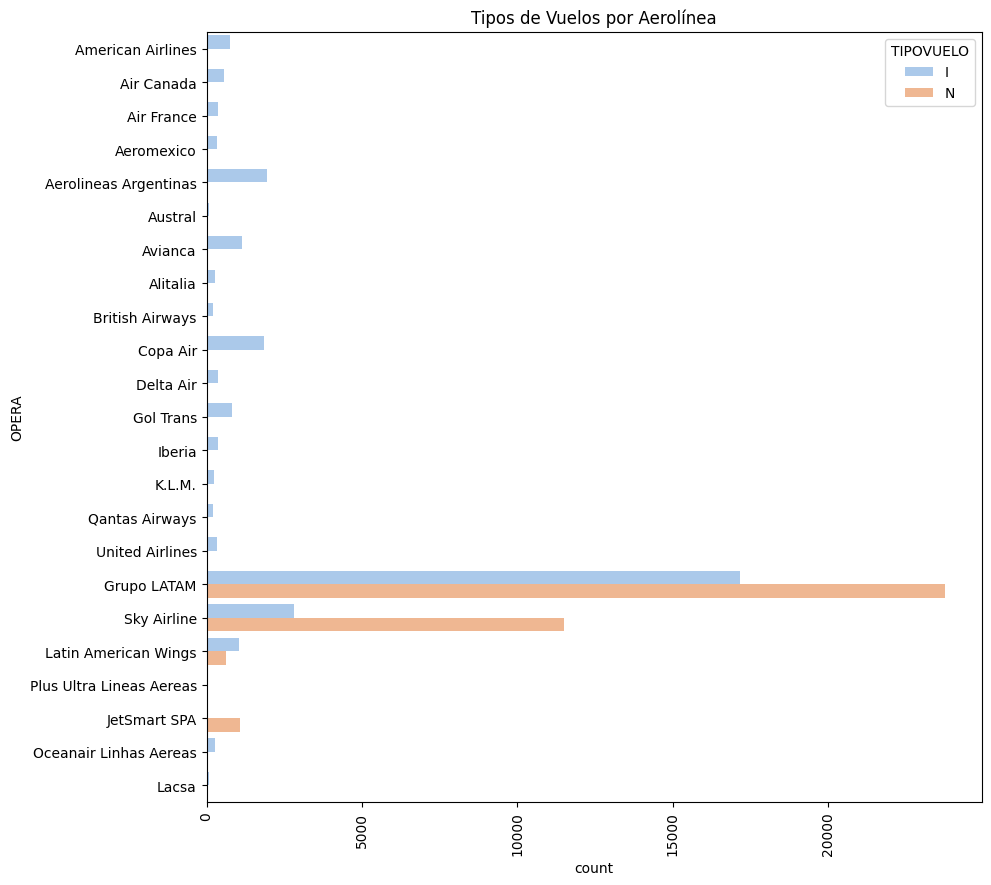

In [149]:
#Gráfica de Vuelos por aerolínea

plt.figure(figsize=(10,10))
sns.countplot(data=df, y=df['OPERA'], hue=df['TIPOVUELO'], palette="pastel")
plt.title("Tipos de Vuelos por Aerolínea")
plt.xticks(rotation=90)
plt.show()

#### 1. R: Con un tabulado simple podemos notar que la mayor cantidad de vuelos se realizaron durante el mes de diciembre (6356); Que el viernes es día con mayor cantidad de operaciones (10292); Que principalmente se concentra en vuelos nacionales ~37000; y que a pesar de esto, el destino favorito es Buenos Aires (6335). Por último cuando observamos los tipos de vuelos por aerolínea notamos que Grupo LATAM lídera la gráfica tanto a nivel nacional como internacional.

#### 2. 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv : 
- temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
- atraso_15 : 1 si dif_min > 15, 0 si no.
- periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I.

In [25]:
df["Fecha-I"]

0        2017-01-01 23:30:00
1        2017-01-02 23:30:00
2        2017-01-03 23:30:00
3        2017-01-04 23:30:00
4        2017-01-05 23:30:00
                ...         
68201    2017-12-22 14:55:00
68202    2017-12-25 14:55:00
68203    2017-12-27 14:55:00
68204    2017-12-29 14:55:00
68205    2017-12-31 14:55:00
Name: Fecha-I, Length: 68206, dtype: object

In [149]:
# 'Fecha-I-Date': Será solo la variable Fecha programada del vuelo
#df["Fecha-I-Date"] = df["Fecha-I"].astype(str)
df["Fecha-I-Date"] = pd.to_datetime(df["Fecha-I"].astype(str), format='%Y/%m/%d').dt.strftime('%d-%m-%Y')
#df["Fecha-I-Date"] = df["Fecha-I-Date"].dt.strftime('%d-%m-%Y')
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha-I-Date,temporada_alta
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,01-01-2017,1
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,02-01-2017,1
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,03-01-2017,1
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,04-01-2017,1
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,05-01-2017,1


In [38]:
# Temporada Alta

for i in df['Fecha-I-Date']:
    if dt.strptime("15-12-2017", '%d-%m-%Y') <= dt.strptime(str(i), '%d-%m-%Y') and dt.strptime(str(i), '%d-%m-%Y') <= dt.strptime("03-03-2017", '%d-%m-%Y'):
        df['temporada_alta'] = 1
    elif dt.strptime("15-07-2017", '%d-%m-%Y') <= dt.strptime(str(i), '%d-%m-%Y') and dt.strptime(str(i), '%d-%m-%Y') <= dt.strptime("31-07-2017", '%d-%m-%Y'):
        df['temporada_alta'] = 1
    elif dt.strptime("11-09-2017", '%d-%m-%Y') <= dt.strptime(str(i), '%d-%m-%Y') and dt.strptime(str(i), '%d-%m-%Y') <= dt.strptime("30-09-2017", '%d-%m-%Y'):
        df['temporada_alta'] = 1
    else:
        df['temporada_alta'] = 0


for i in df['Fecha-I-Date'].tolist():
    if ("15-12-2017" >= i) and (i <= "03-03-2017"):
        df['temporada_alta'] = 1
    else:
        df['temporada_alta'] = 0

In [233]:
#Diferencia en Minutos
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])
df['Fecha-I-O-Diff'] = df['Fecha-O'] - df['Fecha-I']
df['Fecha-I-O-Diff'] = df['Fecha-I-O-Diff'].dt.total_seconds()/60

df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha-I-Date,temporada_alta,Fecha-I-Time,Fecha-O-Time,Fecha-I-O-Diff,atraso_15
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,01-01-2017,0,2017-01-01 23:30:00,2017-01-01 23:33:00,3.0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,02-01-2017,0,2017-01-02 23:30:00,2017-01-02 23:39:00,9.0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,03-01-2017,0,2017-01-03 23:30:00,2017-01-03 23:39:00,9.0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,04-01-2017,0,2017-01-04 23:30:00,2017-01-04 23:33:00,3.0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,I,American Airlines,Santiago,Miami,05-01-2017,0,2017-01-05 23:30:00,2017-01-05 23:28:00,-2.0,0


In [234]:
#Atrasos
for i in range(0, len(df['Fecha-I-O-Diff'])):
    if df['Fecha-I-O-Diff'][i] > 15.0:
        df['atraso_15'][i] = 1
    else:
        df['atraso_15'][i] = 0     
df['atraso_15'].value_counts()


C:\Users\rodgo\AppData\Local\Temp\ipykernel_16756\2562357513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['atraso_15'][i] = 0
C:\Users\rodgo\AppData\Local\Temp\ipykernel_16756\2562357513.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['atraso_15'][i] = 1


0    55592
1    12614
Name: atraso_15, dtype: int64

In [278]:
#Periodo del día en base a Fecha-I
# mañana (entre 5:00 y 11:59)
# tarde (entre 12:00 y 18:59) 
# noche (entre 19:00 y 4:59)
df["Fecha-I-Hora"] = df['Fecha-I'].dt.strftime('%H:%M')

for i in range(0, len(df["Fecha-I-Hora"])):
    if "05:00" <= df["Fecha-I-Hora"][i] <= "11:59":
        df['periodo_dia'][i] = "mañana"
    elif "12:00" <= df["Fecha-I-Hora"][i] <= "18:59":
        df['periodo_dia'][i] = "tarde"     
    else:
        df['periodo_dia'][i] = "noche"  
        
df['periodo_dia'].value_counts()


C:\Users\rodgo\AppData\Local\Temp\ipykernel_16756\2385667465.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['periodo_dia'][i] = "noche"
C:\Users\rodgo\AppData\Local\Temp\ipykernel_16756\2385667465.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['periodo_dia'][i] = "tarde"
C:\Users\rodgo\AppData\Local\Temp\ipykernel_16756\2385667465.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['periodo_dia'][i] = "mañana"


#### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [304]:
#df['atraso_15'].value_counts()
#atraso = df.query("atraso_15" == 1)

#atraso = pd.DataFrame(df.loc[df['atraso_15'] == 1])
#atraso.value_counts()

df.groupby('atraso_15').count().mean()
#df['atraso_15'].describe(include='all')

#df[["SIGLADES", "OPERA"]].groupby("atraso_15")


Fecha-I           34103.0
Vlo-I             34103.0
Ori-I             34103.0
Des-I             34103.0
Emp-I             34103.0
Fecha-O           34103.0
Vlo-O             34102.5
Ori-O             34103.0
Des-O             34103.0
Emp-O             34103.0
DIA               34103.0
MES               34103.0
AÑO               34103.0
DIANOM            34103.0
TIPOVUELO         34103.0
OPERA             34103.0
SIGLAORI          34103.0
SIGLADES          34103.0
Fecha-I-Date      34103.0
temporada_alta    34103.0
Fecha-I-Time      34103.0
Fecha-O-Time      34103.0
Fecha-I-O-Diff    34103.0
Fecha-I-Hora      34103.0
periodo_dia       34103.0
dtype: float64